In [1]:
#Import all the relevant modules
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
from bs4 import BeautifulSoup
from pandas import DataFrame as df

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
import statsmodels.api as sm

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()

import re
import warnings
warnings.filterwarnings('ignore')

# Fetch the data from Worldometers website

In [2]:
#Make a get request to the the Worldometers website
covid_web_page = requests.get("https://www.worldometers.info/coronavirus")
#Gets the text content and uses html.parser parser
soup = BeautifulSoup(covid_web_page.text,'html.parser')
#print(soup.prettify())

# Display the basic overview

In [3]:
#Get the data in div with class name maincounter-number inside the div with class name maincounter-wrap div
covid_data = soup.find_all("div", class_ = "maincounter-number")

#print(covid_data)
print("Coronavirus Cases:", covid_data[0].text.strip())
print("Deaths:",covid_data[0].text.strip())
print("Recovered:",covid_data[0].text.strip())

Coronavirus Cases: 695,724,537
Deaths: 695,724,537
Recovered: 695,724,537


# Fetch today's data for all countries

In [4]:
#Get the data from the table with id main_table_countries_today
country_data = soup.find(id='main_table_countries_today')
#Capture all the rows data
country_content = country_data.find_all('td')
#print(country_content)

# Country Data Cleanup

In [5]:
#Intialize an empty string to store country data
clean_country_data = ""
#Remove | from the data
for data in country_content:
    clean_country_data += data.text.strip() + "|"

#Remove + from the data
clean_country_data = clean_country_data.replace("+","")
#Remove N/A from the data
clean_country_data = clean_country_data.replace("N/A","")

In [6]:
# List of countries from the website
countries = [
    'usa', 'spain', 'italy', 'france', 'germany', 'uk', 'turkey', 'iran', 
    'russia', 'brazil', 'canada', 'belgium', 'netherlands', 'switzerland', 
    'india', 'peru', 'portugal', 'ecuador', 'ireland', 'sweden', 'saudi-arabia', 
    'israel', 'austria', 'mexico', 'singapore', 'japan', 'chile', 'pakistan', 
    'poland', 'romania', 'belarus', 'qatar', 'south-korea', 'united-arab-emirates', 
    'indonesia', 'ukraine', 'denmark', 'serbia', 'philippines', 'norway', 
    'czech-republic', 'australia', 'dominican-republic', 'bangladesh', 'malaysia', 
    'panama', 'colombia', 'finland', 'south-africa', 'egypt', 'morocco', 'argentina', 
    'luxembourg', 'moldova', 'algeria', 'kuwait', 'thailand', 'kazakhstan', 
    'bahrain', 'hungary', 'greece', 'oman', 'croatia', 'uzbekistan', 'iraq', 
    'armenia', 'iceland', 'afghanistan', 'estonia', 'azerbaijan', 'cameroon', 
    'bosnia-and-herzegovina', 'ghana', 'new-zealand', 'lithuania', 'slovenia', 
    'macedonia', 'slovakia', 'cuba', 'bulgaria', 'nigeria', 'cote-d-ivoire', 
    'china-hong-kong-sar', 'djibouti', 'guinea', 'bolivia', 'tunisia', 'latvia', 
    'cyprus', 'andorra', 'albania', 'lebanon', 'niger', 'kyrgyzstan', 'costa-rica', 
    'senegal', 'honduras', 'burkina-faso', 'uruguay', 'sri-lanka', 'san-marino', 
    'channel-islands', 'guatemala', 'georgia', 'democratic-republic-of-the-congo', 
    'malta', 'jordan', 'somalia', 'taiwan', 'reunion', 'mayotte', 'mali', 'kenya', 
    'jamaica', 'state-of-palestine', 'mauritius', 'venezuela', 'el-salvador', 
    'montenegro', 'isle-of-man', 'tanzania', 'viet-nam', 'equatorial-guinea', 
    'sudan', 'paraguay', 'maldives', 'congo', 'rwanda', 'faeroe-islands', 'gabon', 
    'martinique', 'guadeloupe', 'myanmar', 'gibraltar', 'brunei-darussalam', 
    'liberia', 'ethiopia', 'madagascar', 'cambodia', 'trinidad-and-tobago', 
    'french-guiana', 'bermuda', 'cabo-verde', 'aruba', 'togo', 'monaco', 
    'sierra-leone', 'zambia', 'liechtenstein', 'bahamas', 'barbados', 'uganda', 
    'mozambique', 'sint-maarten', 'guyana', 'haiti', 'cayman-islands', 'benin', 
    'libya', 'swaziland', 'french-polynesia', 'guinea-bissau', 'nepal', 'chad', 
    'china-macao-sar', 'syria', 'eritrea', 'saint-martin', 'mongolia', 'malawi', 
    'zimbabwe', 'angola', 'antigua-and-barbuda', 'timor-leste', 'botswana', 
    'central-african-republic', 'laos', 'belize', 'fiji', 'grenada', 'new-caledonia', 
    'curacao', 'dominica', 'namibia', 'saint-kitts-and-nevis', 'saint-lucia', 
    'saint-vincent-and-the-grenadines', 'nicaragua', 'falkland-islands-malvinas', 
    'burundi', 'montserrat', 'turks-and-caicos-islands', 'greenland', 'seychelles', 
    'gambia', 'suriname', 'holy-see', 'papua-new-guinea', 'mauritania', 'bhutan', 
    'british-virgin-islands', 'saint-barthelemy', 'south-sudan', 'western-sahara', 
    'caribbean-netherlands', 'sao-tome-and-principe', 'anguilla', 'saint-pierre-and-miquelon', 
    'yemen', 'china'
]

# Iterate through all the countries
for country in countries:
    # Add country name and look for all following characters
    pattern = country+"[,|\d]*"
    # Search for the pattern and ignore case
    data = re.search(pattern, clean_country_data, re.IGNORECASE)
    #Print all the data groups
#     if data is not None:
#         print(data.group())

# CSV Data

<Axes: xlabel='date'>

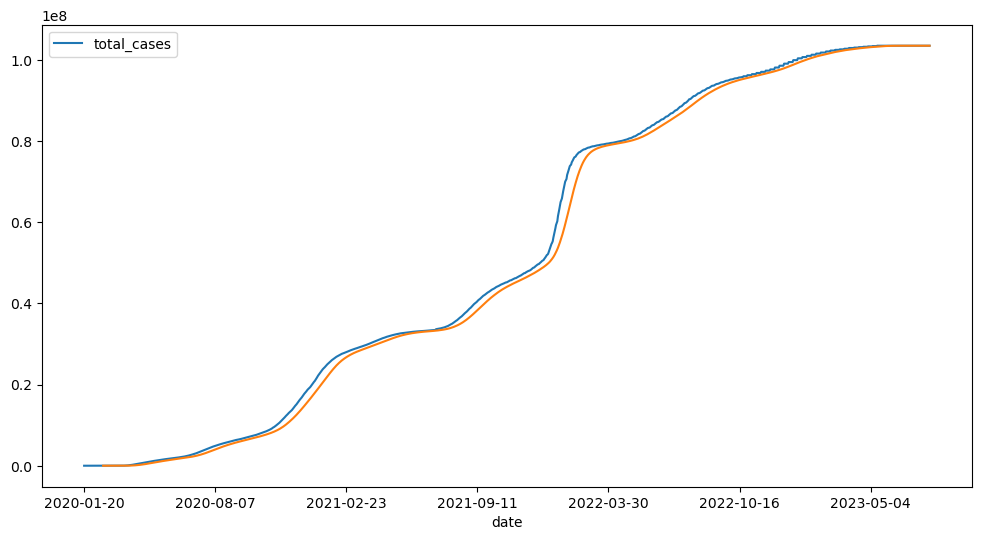

In [7]:
# Import csv file data
owid_df = pd.read_csv('owid-covid-data.csv')

#Get all the columns
owid_df.columns

#Create Numpy array of unique countries
country_df = owid_df.location.unique()
#Display all the countries
country_df 
# Number of countries- 214
country_df.size

# Get indexes for location rows equal to United States
indexer = owid_df[owid_df['location']=='United States'].index
# Get dataframe location and total cases for United States
us_tc = owid_df.loc[indexer, 'date':'total_cases']
# Delete NaN values
us_tc = us_tc.dropna()
# Set date as index
us_tc.set_index('date', inplace=True)
us_tc.plot(figsize=(12,6))

# Plot a 30 day moving average
us_tc.rolling(window=30).mean()['total_cases'].plot()

# Effect of Lockdowns and New Cases

Index(['new_cases_per_million'], dtype='object')
Index(['new_cases_per_million'], dtype='object')


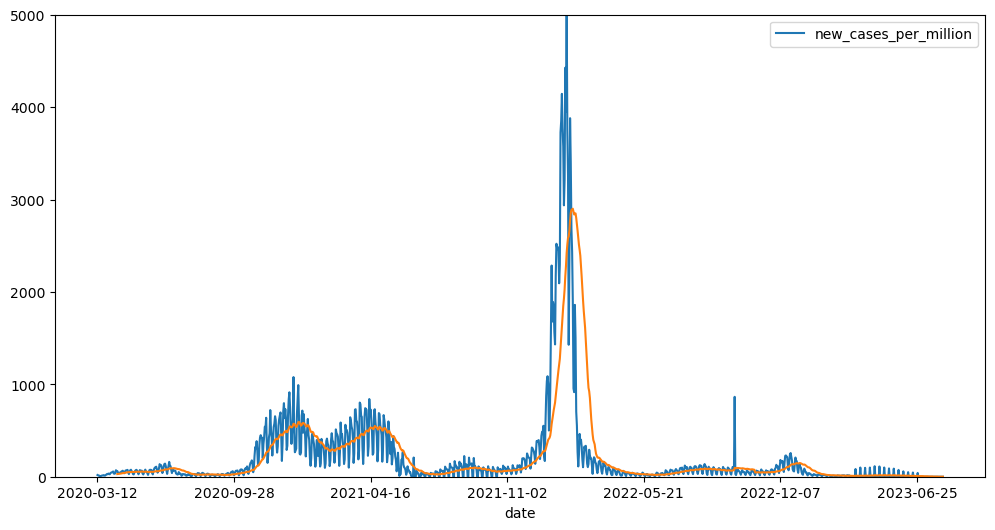

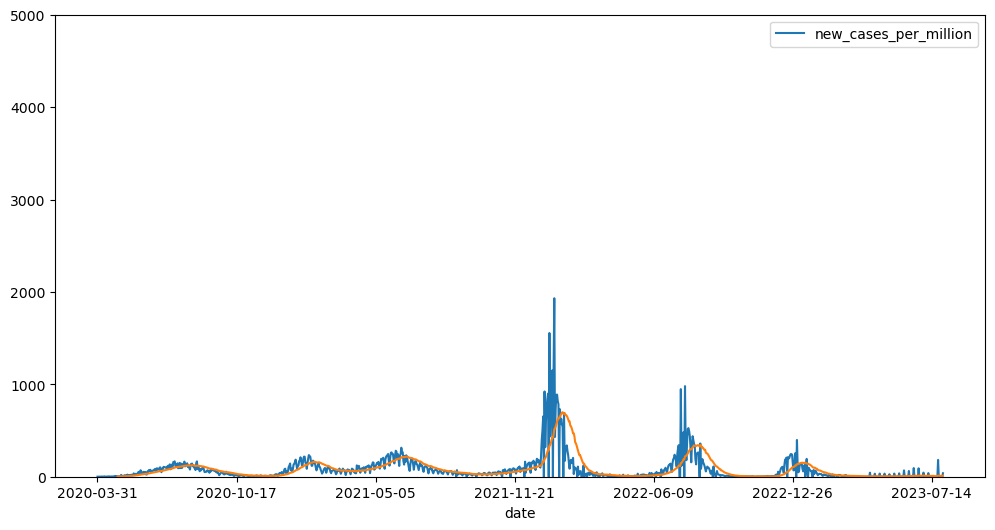

In [8]:
def plot_covid_data(country, col, plot_ma=False, y_max=5000):
    # Get indexes for location rows equal to country name
    indexer = owid_df[owid_df['location']==country].index
    # Get dataframe location and column data for country name
    country_df = owid_df.loc[indexer, 'date':col]
    # Delete NaN values
    country_df = country_df.dropna()
    # Set date as index
    country_df.set_index('date', inplace=True)
    # Remove all columns except for what I want
    country_df.drop(country_df.columns.difference([col]), 1, inplace=True)
    country_df.plot(figsize=(12,6), ylim=[0,y_max])

    # Plot moving average if requested
    if plot_ma:
        # Plot a 30 day moving average
        country_df.rolling(window=30).mean()[col].plot()
    print(country_df.columns)
    
# Least restrictive lockdown
plot_covid_data('Sweden', 'new_cases_per_million', True)
# Most restrictive lockdown measures
plot_covid_data('Bolivia', 'new_cases_per_million', True) 

# Effect of Median Age and Deathrate

Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')


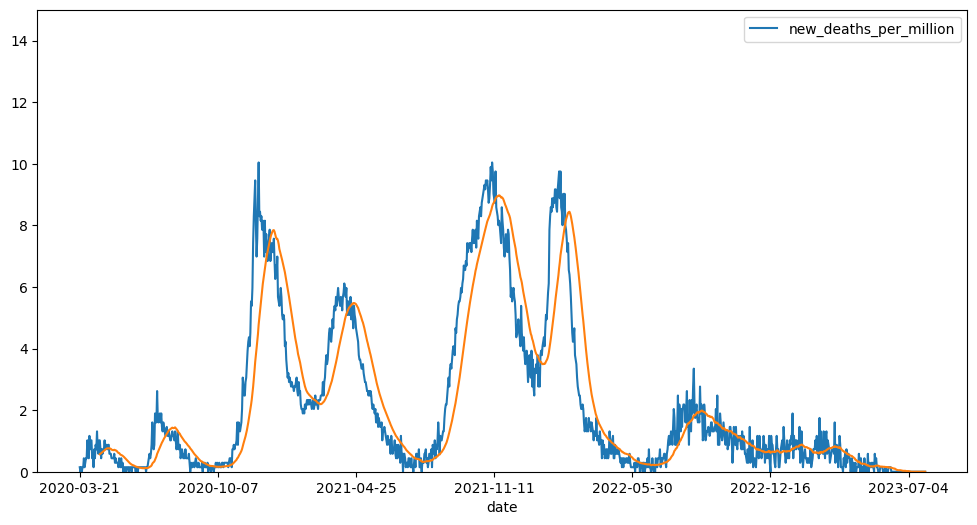

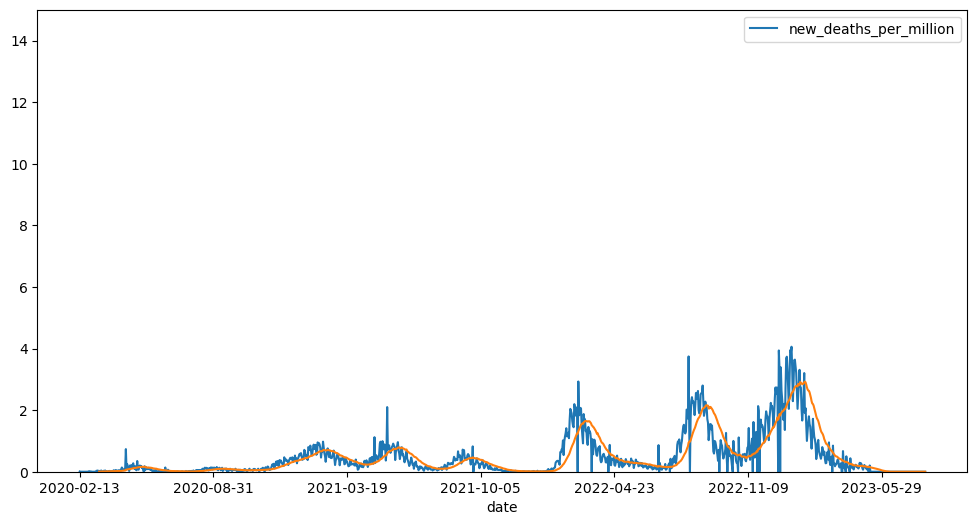

In [9]:
# Country with lowest median age
plot_covid_data('Serbia', 'new_deaths_per_million', True, 15)
# Country with highest median age
plot_covid_data('Japan', 'new_deaths_per_million', True, 15)

# Effect of Obesity and Deathrate

Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')


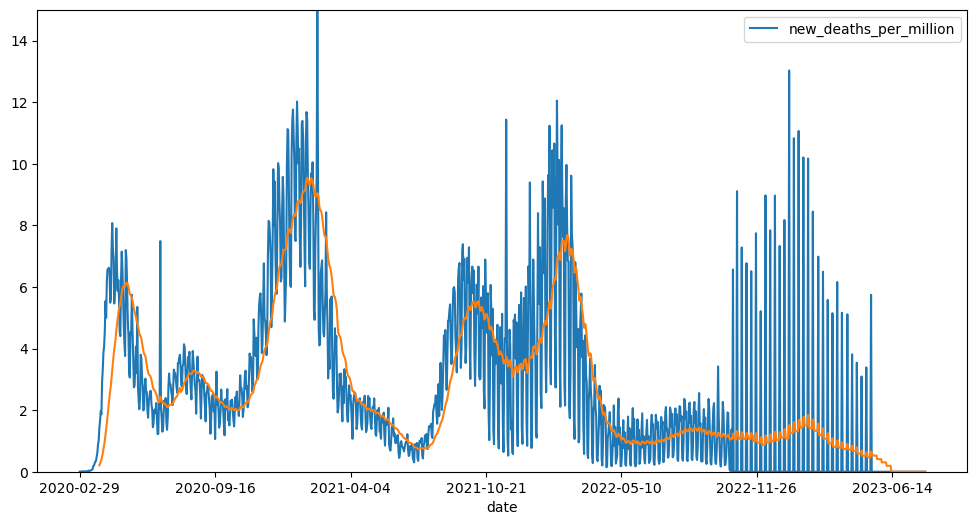

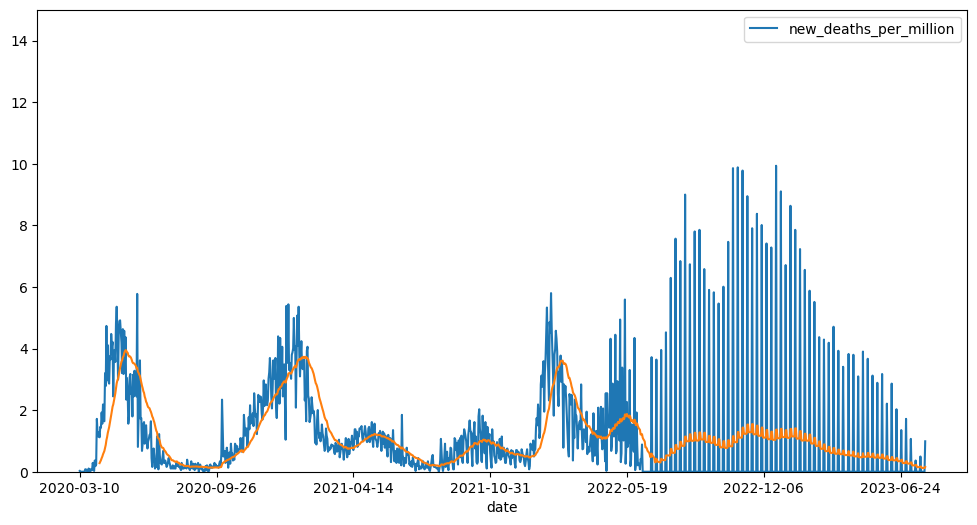

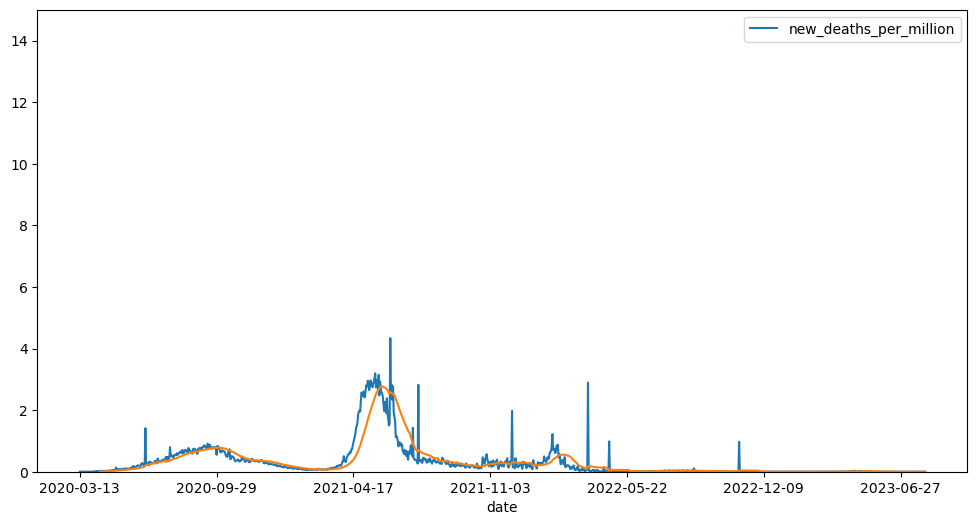

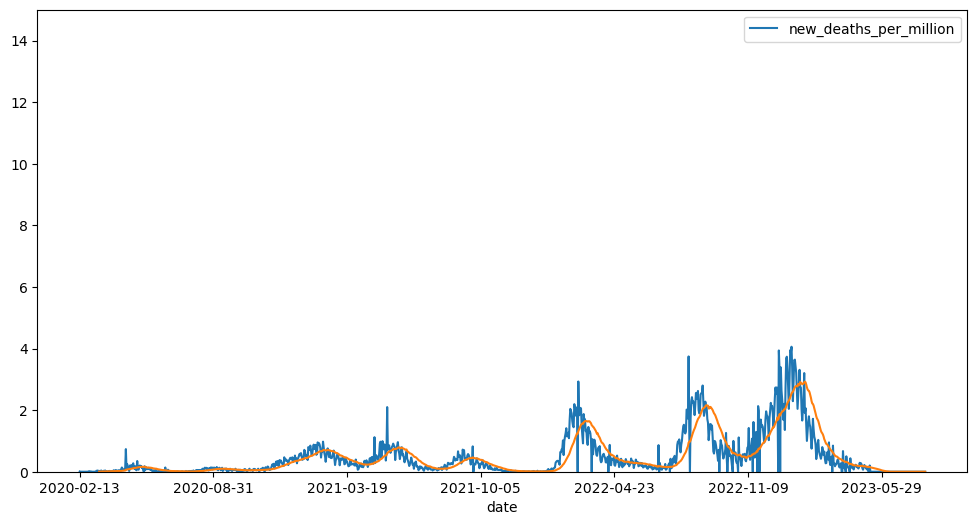

In [10]:
# Countries with higher percentages of obesity
plot_covid_data('United States', 'new_deaths_per_million', True, 15)
plot_covid_data('Canada', 'new_deaths_per_million', True, 15)
#Countries with lower percentages of obesity
plot_covid_data('India', 'new_deaths_per_million', True, 15)
plot_covid_data('Japan', 'new_deaths_per_million', True, 15)

# Effect of Diabetes and Deathrate

Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')


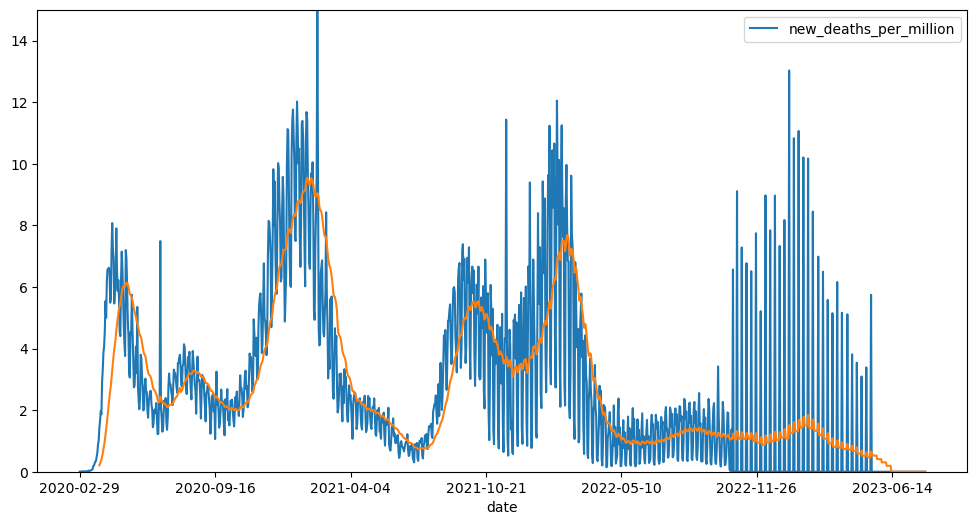

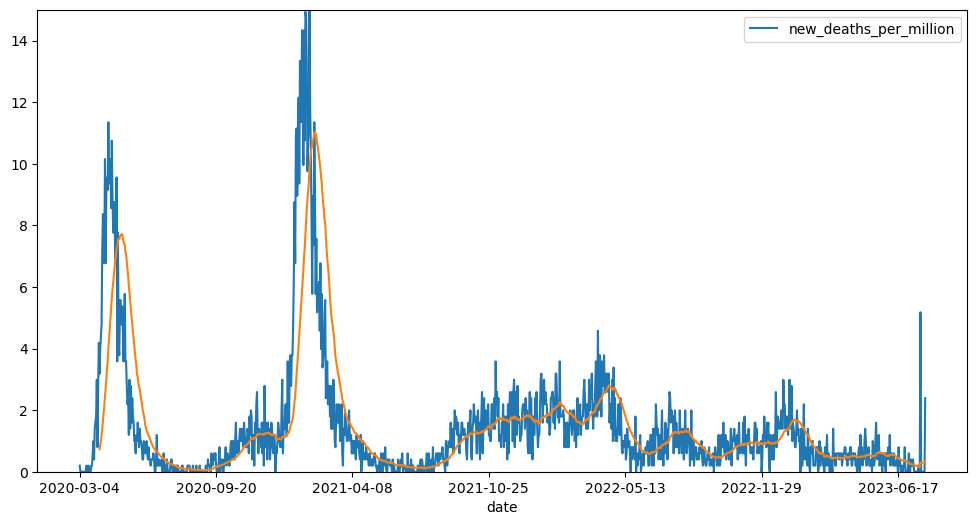

In [11]:
# Country with one of the highest percentage 
plot_covid_data('United States', 'new_deaths_per_million', True, 15)
# Country with one of the lowest percentage
plot_covid_data('Ireland', 'new_deaths_per_million', True, 15)

# Relation between Testing and Deathrate

Index(['new_deaths_per_million'], dtype='object')
Index(['new_deaths_per_million'], dtype='object')


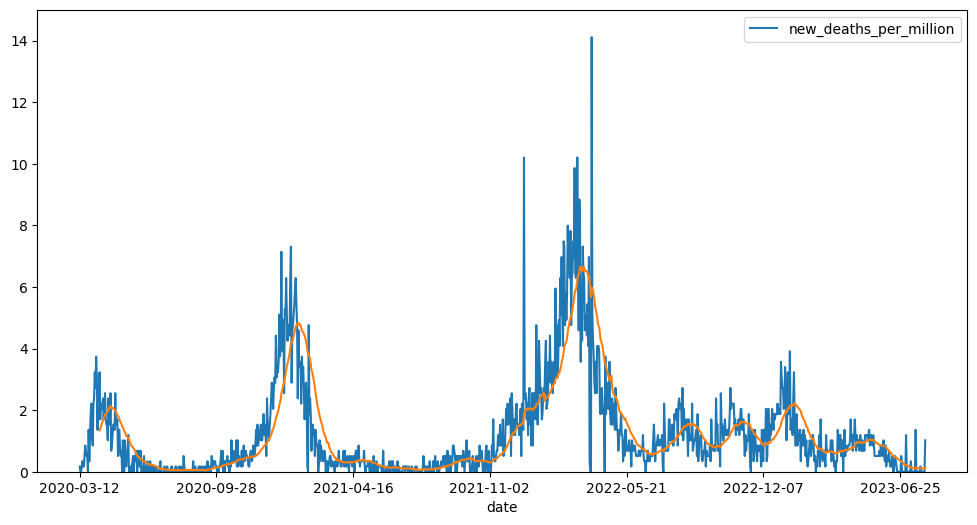

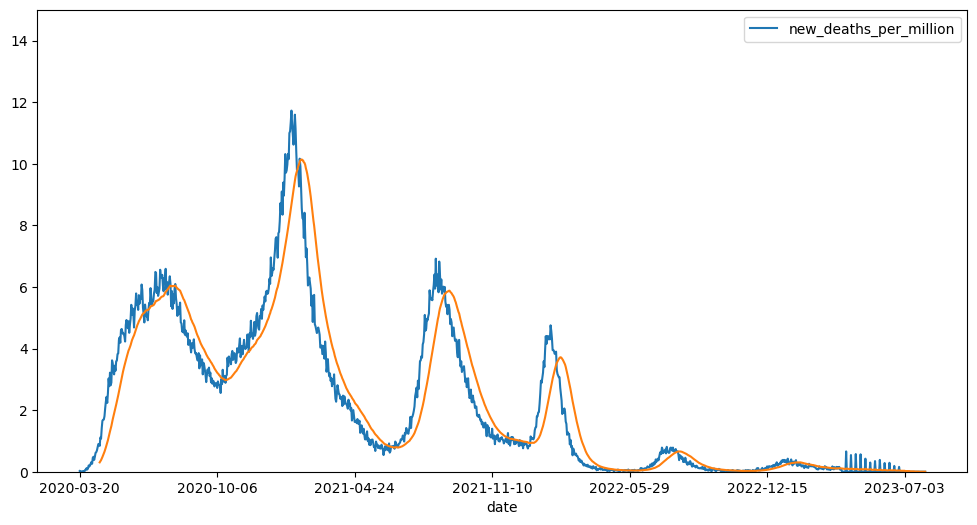

In [12]:
# Country with one of the highest % of deaths
plot_covid_data('Denmark', 'new_deaths_per_million', True, 15)
# Country with one of the lowest % of deaths
plot_covid_data('Mexico', 'new_deaths_per_million', True, 15)